In [1]:
# Importing thhe necessay libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Loading the dataset
# dropping the column

df_avacado = pd.read_csv("avacado.csv")
df_avacado.drop(labels=['Unnamed: 0'], axis = 1, inplace = True)
df_avacado['Date'] = df_avacado['Date'].apply(pd.to_datetime)
df_avacado['ts'] = df_avacado.Date.values.astype(np.int64) // 10 ** 9
df_avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,ts
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,1451174400
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,1450569600
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,1449964800
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,1434067200
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,1448755200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,1476576000
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,1473465600
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,1455062400
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,1474761600


In [3]:
# Checking the shape of the dataset

df_avacado.shape

(1517, 14)

In [4]:
# Let's check the data type of each variable.

df_avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
ts                       int64
dtype: object

The dataset contains 9 columns having 'float64', 2 column as 'int64' and 3 columns having 'object' data type.

In [5]:
# Let's use the describe function to check the statistical summary of the dataset.

df_avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,ts
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1.517000e+03
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,1.440468e+09
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,1.475443e+07
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.420157e+09
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,1.429402e+09
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,1.438474e+09
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,1.448755e+09
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,1.482624e+09


In [6]:
# Let's check the null values.

df_avacado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
ts              0
dtype: int64

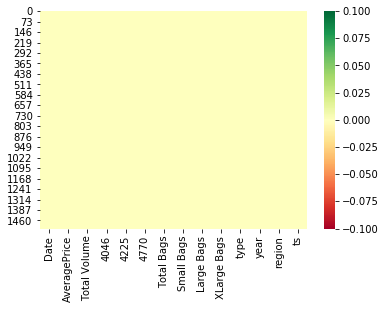

In [7]:
# Visualizationn of null values using heatmap.

sns.heatmap(df_avacado.isnull(), cmap = "RdYlGn")

Thus, from above , it is clear that there are no null values present in the dataset.

In [8]:
# Let's see the correlation.

df_avacado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,ts
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.183959
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.039438
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.066619
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.044310
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.012267
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.040542
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.052889
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.041524
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.186979
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.784683


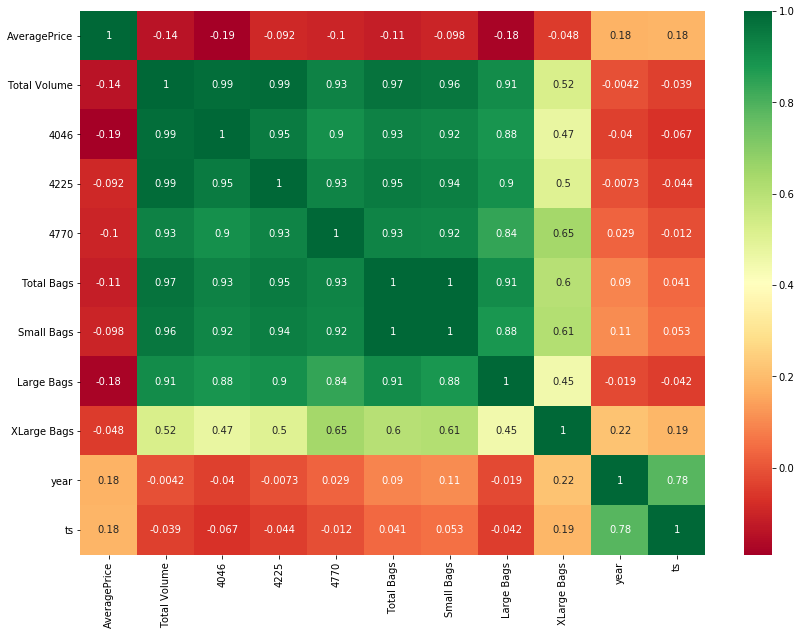

In [9]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(14,10))
sns.heatmap(df_avacado.corr(), cmap= "RdYlGn", annot= True)

In [10]:
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'ts'],
      dtype='object')

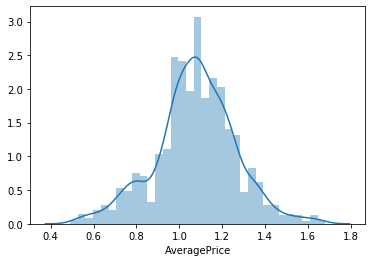

In [11]:
# Let's  check the value counts of the target variable.

sns.distplot(df_avacado.AveragePrice)

In [12]:
df_avacado['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

In [13]:
df_avacado['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [14]:
# Dropping the "Date" because it is not contributing in the dataset.
# dropping "type" also because in whole dataset there is only one type - conventional.

df_avacado = df_avacado.drop(['Date'], axis=1)
df_avacado = df_avacado.drop(['type'], axis=1)

In [15]:
# scaling the 'region' thus converting it into numerical data via labelencoding.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_avacado['region'] = labelencoder.fit_transform(df_avacado['region'])
df_avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,ts
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,1451174400
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,1450569600
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,1449964800
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,1434067200
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,1448755200


In [16]:
# Again checking the value count of 'region'

df_avacado['region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

In [17]:
df_avacado['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [18]:
df_avacado['year'] = df_avacado.year.replace({2015:0, 2016:1})
df_avacado.year.value_counts()

0    1270
1     247
Name: year, dtype: int64

In [19]:
df_avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,ts
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,1451174400
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,1450569600
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,1449964800
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,1434067200
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,1448755200


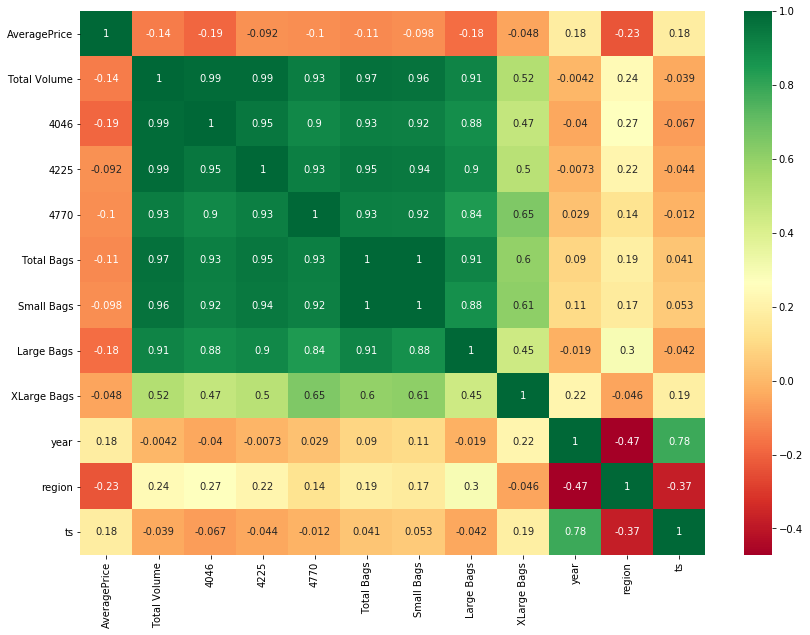

In [20]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(14,10))
sns.heatmap(df_avacado.corr(), cmap= "RdYlGn", annot= True)

In [22]:
# Lets check the skewness of dataset.
df_avacado.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
ts              0.923615
dtype: float64

In [23]:
# Treating the skewness.

for col in df_avacado.columns:
    if df_avacado.skew().loc[col]>0.55:
        df_avacado[col]=np.sqrt(df_avacado[col])

In [24]:
df_avacado.skew()

AveragePrice   -0.109444
Total Volume    3.129360
4046            2.883385
4225            2.891611
4770            2.531303
Total Bags      2.951677
Small Bags      2.956167
Large Bags      2.517165
XLarge Bags     2.916661
year            1.828332
region          0.288146
ts              0.911747
dtype: float64

In [25]:
df_avacado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,ts
0,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.000000,0.0,0,38094.283036
1,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.000000,0.0,0,38086.344009
2,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.000000,0.0,0,38078.403328
3,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.000000,0.0,0,37869.079735
4,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.000000,0.0,0,38062.516995
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,436.859257,239.852267,237.416638,132.407628,243.759020,220.960472,101.757801,15.500968,1.0,7,38426.241034
1513,1.51,422.179760,208.148673,228.450454,139.354117,251.596304,233.889162,92.717636,0.000000,1.0,7,38385.747355
1514,1.48,422.387050,215.324755,229.985608,129.371249,249.831483,230.938542,90.874419,28.722813,1.0,7,38145.280180
1515,1.47,434.892538,232.617261,231.502873,132.270254,252.847246,235.909877,90.984944,0.000000,1.0,7,38402.624910


In [26]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore
z = np.abs(zscore(df_avacado))
print(z.shape)
df_avacado = df_avacado.loc[(z<3).all(axis=1)]
print(df_avacado.shape)

(1517, 12)
(1427, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F587BF348>,
      dtype=object)

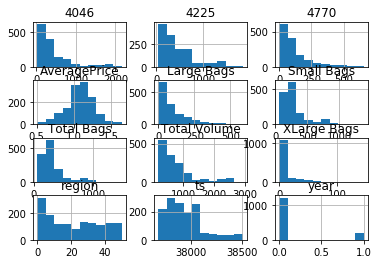

In [27]:
df_avacado.hist()

In [28]:
# Scaling the dataset

standardScaler = StandardScaler()
col = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'ts']
df_avacado[col] = standardScaler.fit_transform(df_avacado[col])

In [29]:
# Creating dummies.

df_avacado_reg = pd.get_dummies(df_avacado, columns = ['region', 'year'])
df_avacado_class = pd.get_dummies(df_avacado, columns = ['year'])

In [30]:
df_avacado_reg

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,ts,...,region_42,region_43,region_44,region_45,region_46,region_47,region_49,region_50,year_0.0,year_1.0
0,1.33,-0.904790,-0.879211,-0.622637,-0.908570,-1.041839,-0.992316,-0.832529,-0.509559,0.803833,...,0,0,0,0,0,0,0,0,1,0
1,1.35,-0.939171,-0.893651,-0.682551,-0.902712,-1.022685,-0.971652,-0.830594,-0.509559,0.761237,...,0,0,0,0,0,0,0,0,1,0
2,0.93,-0.742869,-0.888499,-0.359330,-0.870923,-1.055418,-1.007315,-0.828078,-0.509559,0.718632,...,0,0,0,0,0,0,0,0,1,0
3,1.08,-0.855333,-0.875858,-0.527845,-0.895307,-1.118766,-1.077161,-0.815509,-0.509559,-0.404481,...,0,0,0,0,0,0,0,0,1,0
4,1.28,-0.954110,-0.882721,-0.687715,-0.893747,-1.107890,-1.067304,-0.793265,-0.509559,0.633394,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,-0.576208,-0.398004,-0.611616,0.144862,-0.361843,-0.367425,-0.011318,0.122509,2.584934,...,0,0,0,0,0,0,0,0,0,1
1513,1.51,-0.602507,-0.471473,-0.635949,0.203184,-0.326433,-0.304409,-0.091924,-0.509559,2.367667,...,0,0,0,0,0,0,0,0,0,1
1514,1.48,-0.602136,-0.454843,-0.631783,0.119368,-0.334407,-0.318790,-0.108358,0.661644,1.077455,...,0,0,0,0,0,0,0,0,0,1
1515,1.47,-0.579732,-0.414770,-0.627665,0.143708,-0.320781,-0.294559,-0.107373,-0.509559,2.458223,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df_avacado_class

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,ts,year_0.0,year_1.0
0,1.33,-0.904790,-0.879211,-0.622637,-0.908570,-1.041839,-0.992316,-0.832529,-0.509559,0,0.803833,1,0
1,1.35,-0.939171,-0.893651,-0.682551,-0.902712,-1.022685,-0.971652,-0.830594,-0.509559,0,0.761237,1,0
2,0.93,-0.742869,-0.888499,-0.359330,-0.870923,-1.055418,-1.007315,-0.828078,-0.509559,0,0.718632,1,0
3,1.08,-0.855333,-0.875858,-0.527845,-0.895307,-1.118766,-1.077161,-0.815509,-0.509559,0,-0.404481,1,0
4,1.28,-0.954110,-0.882721,-0.687715,-0.893747,-1.107890,-1.067304,-0.793265,-0.509559,0,0.633394,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,-0.576208,-0.398004,-0.611616,0.144862,-0.361843,-0.367425,-0.011318,0.122509,7,2.584934,0,1
1513,1.51,-0.602507,-0.471473,-0.635949,0.203184,-0.326433,-0.304409,-0.091924,-0.509559,7,2.367667,0,1
1514,1.48,-0.602136,-0.454843,-0.631783,0.119368,-0.334407,-0.318790,-0.108358,0.661644,7,1.077455,0,1
1515,1.47,-0.579732,-0.414770,-0.627665,0.143708,-0.320781,-0.294559,-0.107373,-0.509559,7,2.458223,0,1


By comparing shape of 'z' and 'df_heart' shape , 43 rows have been removed as outliers.

The data cleaning is done.

In [32]:
# Separating the input and target variables

X_reg = df_avacado_reg.drop(columns=["AveragePrice"])
y_reg = df_avacado_reg[["AveragePrice"]]

X_class = df_avacado.drop(columns=["region"])
y_class = df_avacado[["region"]]

In [33]:
# Splitting the training and testing data and finding the maximum r2 score at random state.
def max_r2_score (reg, X, y):
    max_r_scr = 0
    final_r_state = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
    print("Maximum r2 score corresponding to", final_r_state, "is :", max_r_scr)

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

lr = LinearRegression()
r_state = max_r2_score(lr, X_reg, y_reg)

Maximum r2 score corresponding to 85 is : 0.8229667702032544


In [35]:
# Cross validation with linear regression

print("Mean r2 score :", cross_val_score(lr, X_reg, y_reg, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lr, X_reg, y_reg, cv=5, scoring = "r2").std())

Mean r2 score : -2.1603565767724014e+24
Standard Deviationin r2 score : 3.7126709059380406e+24


In [36]:
# Checking the lasso regression and finding the best alpha value.

from sklearn.linear_model import Lasso
lreg = Lasso()
parameters = {"alpha":[0.001,0.01,0.1,1]}
cl = GridSearchCV(lreg, parameters,cv=10)
cl.fit(X_reg,y_reg)
cl.best_params_

{'alpha': 0.01}

In [37]:
# Checking the max. r2  score with lasso regression

lreg = Lasso(alpha=0.01)
r_state = max_r2_score(lreg, X_reg, y_reg)

Maximum r2 score corresponding to 75 is : 0.3852376603611102


In [38]:
# Cross validation with lasso regression

print("Mean r2 score :", cross_val_score(lreg, X_reg, y_reg, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lreg, X_reg, y_reg, cv=5, scoring = "r2").std())

Mean r2 score : 0.1326782835287889
Standard Deviationin r2 score : 0.25381400450032154


In [39]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = .20, random_state = 85)

In [40]:
def algo(clf):
    clf.fit(X_train_reg, y_train_reg)
    print ("Train acc",clf.score(X_train_reg,y_train_reg))
    print ("Test acc" ,clf.score(X_test_reg, y_test_reg))

In [41]:
algo(RandomForestRegressor())

Train acc 0.9742460567675054
Test acc 0.8744213504035824


In [42]:
algo(LinearRegression())

Train acc 0.7690008650201581
Test acc 0.8229667702032544


In [43]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = .20, random_state = 85)

In [44]:
def algo_class(clf):
    clf.fit(X_train_class, y_train_class)
    y_pred_train = clf.predict(X_train_class)
    y_pred_test = clf.predict(X_test_class)
    print ("Train acc",accuracy_score(y_pred_train,y_train_class))
    print ("Test acc" ,accuracy_score(y_pred_test, y_test_class))

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
algo_class(RandomForestClassifier())

Train acc 1.0
Test acc 0.9685314685314685


In [47]:
algo_class(LogisticRegression())

Train acc 0.8746713409290097
Test acc 0.8251748251748252


So, for the target variable "AveragePrice" the Random forest regressor and for the target variable "Region", the Random Forest Classifier is selected for the model as it is giving the best result.

In [48]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(algo_class, 'rf_avacado.pkl')

['rf_avacado.pkl']